In [1]:
# 1. 라이브러리 설치 (최초 1회)
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# 2. 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 3. 파일 경로 및 데이터 불러오기
import pandas as pd
import os

file_path = '/content/drive/MyDrive/회사업무/체납/24년11월 체납확정.csv'

if not os.path.exists(file_path):
    raise FileNotFoundError(f"[오류] 파일 경로 확인 필요: {file_path}")

try:
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8', low_memory=False, on_bad_lines='skip')

# 4. 컬럼 정리 및 문자열 정제
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 5. 주요 컬럼 파악
print("\n✅ 전체 컬럼 목록:")
print(df.columns.tolist())

# 필요시 상위 10행 미리보기
df.head(10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 628.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
Mounted at /content/drive


<ipython-input-1-0af5021f504d>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



✅ 전체 컬럼 목록:
['미납조치년월', '회계센터구분', '구분1(부서별)', '구분2(체납구분)', '구분3(BM별)', '구분4(단계별)', '구분5(서비스개시)', '구분6(미납발생)', '미납관리본부', '미납관리부서', '청구년월', '미납개월수', '청구번호', '청구순번', '청구멤버번호', '청구고객번호', '청구멤버고객번호', '미납마스터청구본부', '미납마스터청구지사', '미납청구본부', '미납청구지사', '미납관리본부.1', '미납관리지사', '현행관리본부', '현행관리지사', '현행청구본부', '현행청구지사', '계약본부', '계약지사', '영업본부', '영업지사', '매출본사', '해지일자', '계약번호', '서비스번호', '서비스대', '서비스중', '서비스소', '상품구분', 'BM', '최초서비스개시일', '구역관리번호', '영업구역번호', '청구고객명', '청구고객상호명', '청구맴버고객명', '청구맴버상호명', '청구지주소', '설치주소', '서비스청구금액', '가산금', '위약금', '총청구액', '원단위절사금액', '총수납액', '현미납금액', '미납금액', '면책제외코드', '고객분류', '고객구분', '합산여부', '선후납구분', '수납방법', '고객상태대분류', '고객상태중분류', 'A/S건수', '출동 건수', '영업자', '팩토링여부', '월정료_청구금', '월정료_수납금', '월정료_미납금', '신규설치공사비_청구금', '신규설치공사비_수납금', '신규설치공사비_미납금', '설치공사비_청구금', '설치공사비_수납금', '설치공사비_미납금', '철거비_청구금', '철거비_수납금', '철거비_미납금', '부가상품판매비_청구금', '부가상품판매비_수납금', '부가상품판매비_미납금', '일시정지회선료_청구금', '일시정지회선료_수납금', '일시정지회선료_미납금', '긴급출동료_청구금', '긴급출동료_수납금', '긴급출동료_미납금', '인력경비_청구금', '인력경비_수납금', '인력경비_미납금', '추가공급가_청구금',

,미납조치년월,회계센터구분,구분1(부서별),구분2(체납구분),구분3(BM별),구분4(단계별),구분5(서비스개시),구분6(미납발생),미납관리본부,미납관리부서,...,해지위약금_미납금,가산금_청구금,가산금_수납금,가산금_미납금,유지보수비_청구금,유지보수비_수납금,유지보수비_미납금,합산체납,납기일,체납개월
0,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,서대문지사,...,0,1340,0,1340,0,0,0,"67,100",12/2/2024,1
1,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,서대문지사,...,0,0,0,0,0,0,0,"79,200",12/2/2024,1
2,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,서대문지사,...,0,60,0,60,0,0,0,"2,860",12/2/2024,1
3,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,서대문지사,...,0,660,0,660,0,0,0,"27,880",12/2/2024,1
4,202411,NaN,마케팅부문,단기,영상보안,2개월이하,유지,신규체납,강북/강원본부,강북지사,...,0,830,0,830,0,0,0,"41,800",12/2/2024,1
5,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,강북지사,...,0,0,0,0,0,0,0,"77,000",12/2/2024,1
6,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,고양지사,...,0,480,0,480,0,0,0,"77,880",12/2/2024,1
7,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,고양지사,...,0,60,0,60,0,0,0,"3,300",12/2/2024,1
8,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,고양지사,...,0,0,0,0,0,0,0,"37,400",12/2/2024,1
9,202411,NaN,마케팅부문,단기,출동보안,2개월이하,유지,신규체납,강북/강원본부,의정부지사,...,0,1630,0,1630,0,0,0,"82,500",12/2/2024,1


In [ ]:
# 1. 라이브러리 설치 (최초 1회)
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# 2. 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 3. 파일 경로 및 데이터 불러오기
import pandas as pd
import os

file_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'

if not os.path.exists(file_path):
    raise FileNotFoundError(f"[오류] 파일 경로 확인 필요: {file_path}")

try:
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='utf-8', low_memory=False, on_bad_lines='skip')

# 4. 컬럼 정리 및 문자열 정제
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 5. 주요 컬럼 파악
print("\n✅ 전체 컬럼 목록:")
print(df.columns.tolist())

# 필요시 상위 10행 미리보기
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ 전체 컬럼 목록:
['미납관리본부', '미납관리부서', '현행관리본부', '현행관리지사', '청구번호', '고객번호', '계약번호', '청구멤버고객명', '청구멤버상호명', '서비스개시일', '신규/유지', '고객상태', '수납방법', '선후납', '설치주소', '영업관리번호', '영업자', '체납개월', 'BM', '체납액', '회수액', '잔존체납액', '이관시설여부/집계제외', '고객휴', '5.21', '5.22']


<ipython-input-2-fa64391986a5>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,미납관리본부,미납관리부서,현행관리본부,현행관리지사,청구번호,고객번호,계약번호,청구멤버고객명,청구멤버상호명,서비스개시일,...,영업자,체납개월,BM,체납액,회수액,잔존체납액,이관시설여부/집계제외,고객휴,5.21,5.22
0,강북/강원본부,원주지사,강원본부,원주지사,680306,160927,680306,원주시장,원주시청(양궁장외10개소),2003-03-01,...,김미경,1,시스템(고액),"1,243,000","1,243,000",-,NaN,010-2772-6536,,"110,009"
1,대구/경북본부,서대구지사,대구/경북본부,서대구지사,40197440,30081307,50180037,에이브이오카본코리아(주),에이브이오카본코리아(주)(OCT),2012-09-04,...,이윤호,1,시스템(고액),"896,500","896,500",-,NaN,010-2617-9234,,
2,기업고객본부,전략고객팀,대구/경북본부,포항지사,40202343,90045594,52160172,하나은행,하나은행-경주금융센터(365코너),2007-06-30,...,이창환,1,시스템(고액),"864,000",-,"864,000",NaN,010---7404,"409,999",
3,강북/강원본부,중앙지사,강북/강원본부,중앙지사,40262215,30102746,51933862,(재)씨젠의료재단,씨젠의료재단_5층(OCT),2024-02-08,...,최성욱,2,시스템(고액),"887,109",-,"887,109",NaN,010-3704-6531,,"491,695"
4,충남/충북본부,충남서부지사,충남/충북본부,충남서부지사,40448477,30094819,50408536,(주)이엔이텍,이엔이텍(OCT),2014-11-18,...,정민영,3,시스템(고액),"541,200",-,"541,200",NaN,010-8626-6280,,
5,강남/서부본부,부천지사,서부본부,부천지사,40459408,30171047,50311887,유경미,리치패밀리(DVR),2013-12-17,...,양현모,4,시스템(고액),"616,000",-,"616,000",NaN,010-4417-0036,,
6,충남/충북본부,충북지사,충남/충북본부,충북지사,40514714,30193594,50468009,장복임,청주매매단지(씨제이카),2015-05-08,...,방한솔,5,시스템(고액),"569,140","569,140",-,NaN,010-5482-0852,,
7,강북/강원본부,원주지사,강원본부,원주지사,40579580,30223175,50528451,"1288부대(하늘정원9,10,11동)","1288부대(하늘정원9,10,11동)",2015-09-30,...,최춘식,5,시스템(고액),"1,210,000",-,"1,210,000",이관시설,010-4956-8410,,
8,충남/충북본부,천안지사,충남/충북본부,천안지사,40607748,30240050,50555330,(주)아인스 천안지점,아인스-천안지점(가드),2015-11-27,...,윤장섭,5,시스템(고액),"1,593,406",-,"1,593,406",이관시설,010-000-2370,,
9,강북/강원본부,중앙지사,강북/강원본부,중앙지사,40697673,30284876,50639080,10.08화전일9:00이한구씨지,동대문구청도로과,2016-05-31,...,정승원,5,시스템(고액),"550,000",-,"550,000",이관시설,011-751-3709,,


In [ ]:
1. 체납활동대상 경로 : target_path = "/content/drive/My Drive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv"

2. 수납정보 경로 :  /content/drive/My Drive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv

체납활동대상 파일  기준으로 수납정보를 매핑하는데

기준값은 체납활동대상 : 청구번호와
수납정보 청구멤버번호 컬럼을 비교하여 수납정보의 수납 합계 컬럼 값을 체납활동대상 우측에 적용하는데
추가 조건은 청구멤버번호가 동일한것을 체납활동대상 우측에 열추가하여적용, 수납일자가 당월 다수일경우 우츨열 헤더에 수납일자를 기록하고 수납금액을 적용




In [ ]:
# ✅ 1. 라이브러리 설치 (최초 1회만 필요)
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
import os

# ✅ 4. 파일 경로 정의
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 5. 체납대상 데이터 불러오기
if not os.path.exists(target_path):
    raise FileNotFoundError(f"[오류] 체납대상 파일 경로 확인 필요: {target_path}")

df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 6. 수납정보 데이터 불러오기
if not os.path.exists(receipt_path):
    raise FileNotFoundError(f"[오류] 수납정보 파일 경로 확인 필요: {receipt_path}")

df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 날짜 형식 변환 및 수치형 변환
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'], errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 수납일자별 수납합계 피벗 생성
pivot_receipt = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot_receipt.columns.name = None  # 멀티인덱스 제거
pivot_receipt.columns = [str(col) for col in pivot_receipt.columns]

# ✅ 9. 병합: 청구번호 기준
df_merged = df_target.merge(pivot_receipt, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 10. 저장 (엑셀로)
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_0522.xlsx'
df_merged.to_excel(output_path, index=False)
print(f"✅ 최종 병합 결과 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-2cff99315ac3>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_target = df_target.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-4-2cff99315ac3>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_receipt = df_receipt.applymap(lambda x: x.strip() if isinstance(x, str) else x)


KeyError: '수납합계'

In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 임포트
import pandas as pd
import os

# ✅ 4. 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 5. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 6. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 컬럼 확인
print("✅ 수납 정보 컬럼 목록:")
print(df_receipt.columns.tolist())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 수납 정보 컬럼 목록:
['청구본부', '청구지사', '청구년월', '청구순번', '청구번호', '청구멤버번호', '고객명', '상호명', '고객번호', '계약번호', '요금항목', '서비스대', '서비스중', '서비스소', '수납구분', '수납액', '수납부가세', '수납 합계', '수납일자', '실입금일', '은행', '계좌번호', '팩토링여부']


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 임포트
import pandas as pd
import os

# ✅ 4. 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 5. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 6. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 날짜 및 숫자 변환
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'], errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 수납일자별 수납합계 피벗 생성
pivot_receipt = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot_receipt.columns.name = None
pivot_receipt.columns = [str(col) for col in pivot_receipt.columns]

# ✅ 9. 병합 (청구번호 ↔ 청구멤버번호)
df_merged = df_target.merge(pivot_receipt, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 10. 결과 저장
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_0522.xlsx'
df_merged.to_excel(output_path, index=False)
print(f"\n✅ 최종 병합 결과 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ 최종 병합 결과 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_0522.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# ✅ 2. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
import os

# ✅ 4. 파일 경로 정의
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 5. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 6. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 날짜 및 숫자 처리
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'], errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 수납일자 기준 피벗 테이블 생성
pivot_receipt = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot_receipt.columns.name = None
pivot_receipt.columns = [str(col) for col in pivot_receipt.columns]

# ✅ 9. 병합
df_merged = df_target.merge(pivot_receipt, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 10. 천단위 콤마 포맷 적용 (수납일자 열만 대상)
수납일자_열목록 = [col for col in df_merged.columns if col.startswith('2025-')]
df_merged[수납일자_열목록] = df_merged[수납일자_열목록].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 11. 저장
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_0522_포맷적용.xlsx'
df_merged.to_excel(output_path, index=False)
print(f"\n✅ 최종 저장 완료 (천단위 콤마 적용): {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-ec51e2900155>:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[수납일자_열목록] = df_merged[수납일자_열목록].applymap(



✅ 최종 저장 완료 (천단위 콤마 적용): /content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_0522_포맷적용.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade gspread pandas matplotlib seaborn --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리
import pandas as pd
import os

# ✅ 4. 경로
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 5. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 6. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 날짜와 금액 처리
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'], errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 수납일자가 유효한 데이터만 필터링 (1970-01-01 방지)
df_receipt = df_receipt[df_receipt['수납일자'].notna()]

# ✅ 9. 수납일자 오름차순 열 생성용 피벗
pivot_receipt = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot_receipt.columns.name = None
pivot_receipt.columns = [str(col) for col in pivot_receipt.columns]

# ✅ 10. 병합
df_merged = df_target.merge(pivot_receipt, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 11. 천단위 콤마 포맷 (날짜 컬럼만)
date_cols = [col for col in df_merged.columns if col.startswith('2025-')]
df_merged[date_cols] = df_merged[date_cols].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 12. 저장
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_수정본_0522.xlsx'
df_merged.to_excel(output_path, index=False)
print(f"\n✅ 최종 저장 완료 (열 이름 및 콤마 적용 완료): {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-2fa7e3d74583>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[date_cols] = df_merged[date_cols].applymap(



✅ 최종 저장 완료 (열 이름 및 콤마 적용 완료): /content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_수정본_0522.xlsx


In [ ]:
# ✅ 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 라이브러리
import pandas as pd
import os

# ✅ 파일 경로
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'

# ✅ 체납 대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 수납 정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 수납일자 변환 (YYYYMMDD → datetime)
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 유효한 수납일자만 필터링
df_receipt = df_receipt[df_receipt['수납일자'].notna()]

# ✅ 피벗 테이블 생성 (수납일자 기준 열 분리)
pivot_receipt = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot_receipt.columns.name = None
pivot_receipt.columns = [str(col) for col in pivot_receipt.columns]

# ✅ 병합
df_merged = df_target.merge(pivot_receipt, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 천단위 콤마 포맷 (수납일자 열만)
date_cols = [col for col in df_merged.columns if col.startswith('2025-')]
df_merged[date_cols] = df_merged[date_cols].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 저장
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_형식수정.xlsx'
df_merged.to_excel(output_path, index=False)
print(f"\n✅ 완료: 날짜 형식 수정 및 수납일자별 열 정리 → {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-9-3b8c8a86b338>:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[date_cols] = df_merged[date_cols].applymap(



✅ 완료: 날짜 형식 수정 및 수납일자별 열 정리 → /content/drive/MyDrive/시설/체납/본사_임훈/결과_수납매핑_형식수정.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치 (최초 1회만)
!pip install --upgrade gspread pandas matplotlib seaborn openpyxl xlsxwriter --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 필수 모듈 불러오기
import pandas as pd
import os
from datetime import datetime

# ✅ 4. 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 8. 수납일자 및 금액 정제
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')
df_receipt = df_receipt[df_receipt['수납일자'].notna()]

# ✅ 9. 수납일자별 피벗 테이블 생성
pivot = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot.columns.name = None
pivot.columns = [str(c) for c in pivot.columns]

# ✅ 10. 총 수납합계 계산
sum_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[sum_cols].sum(axis=1)

# ✅ 11. 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 12. 날짜 열 추출 및 천단위 콤마 포맷
date_cols = [col for col in df_merged.columns if col.startswith('2025-')]
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].map(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 13. 총 수납합계 숫자형 변환 (에러 방지)
df_merged['총 수납합계_숫자'] = pd.to_numeric(
    df_merged['총 수납합계'].str.replace(',', '', regex=False),
    errors='coerce'
)

# ✅ 14. 체납액 컬럼명 지정 (V열에 해당)
arrears_col = '체납액'  # 실제 컬럼명이 다르면 수정 필요
df_merged[arrears_col] = pd.to_numeric(df_merged[arrears_col], errors='coerce')

# ✅ 15. 잔존체납액 계산
df_merged[잔존_col명] = df_merged[arrears_col] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))  # 음수 제거
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 16. 숫자형 보조 열 제거
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)

# ✅ 17. 열 위치 정렬 (청구멤버번호 옆으로 이동)
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 18. 엑셀 저장 + 노란색 음영 포맷 적용
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook  = writer.book
    worksheet = writer.sheets['통합결과']

    # ✅ 노란 음영 포맷 정의
    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})

    # ✅ 포맷 적용 대상 열
    col1 = df_merged.columns.get_loc('총 수납합계')
    col2 = df_merged.columns.get_loc(잔존_col명)
    worksheet.set_column(col1, col1, 18, yellow_fmt)
    worksheet.set_column(col2, col2, 20, yellow_fmt)

print(f"\n✅ 최종 엑셀 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ 최종 엑셀 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치 (최초 1회만)
!pip install --upgrade gspread pandas matplotlib seaborn openpyxl xlsxwriter --quiet

# ✅ 2. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
import os
from datetime import datetime

# ✅ 4. 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 8. 수납일자 및 금액 처리
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')
df_receipt = df_receipt[df_receipt['수납일자'].notna()]

# ✅ 9. 수납일자별 피벗 생성
pivot = df_receipt.pivot_table(
    index='청구멤버번호',
    columns=df_receipt['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot.columns.name = None
pivot.columns = [str(c) for c in pivot.columns]

# ✅ 10. 총 수납합계 계산
sum_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[sum_cols].sum(axis=1)

# ✅ 11. 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 12. 날짜별 수납 열 리스트
date_cols = [col for col in df_merged.columns if col.startswith('2025-')]

# ✅ 13. 날짜별 수납 금액, 총 수납합계에 천단위 콤마 적용
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].map(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 14. 총 수납합계 숫자형 변환 (빈칸 처리 포함)
df_merged['총 수납합계_숫자'] = pd.to_numeric(
    df_merged['총 수납합계'].str.replace(',', '', regex=False),
    errors='coerce'
)

# ✅ 15. 체납액 변환 (콤마 포함 문자열 → 숫자)
arrears_col = '체납액'
df_merged[arrears_col] = pd.to_numeric(
    df_merged[arrears_col].str.replace(',', '', regex=False),
    errors='coerce'
)

# ✅ 16. 잔존체납액 계산
df_merged[잔존_col명] = df_merged[arrears_col] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))  # 음수 방지
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 17. 숫자 계산용 열 제거
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)

# ✅ 18. 열 위치 정렬: 청구멤버번호 옆에 총수납합계 → 잔존체납액 삽입
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 19. 엑셀 저장 (노란 음영 포함)
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook  = writer.book
    worksheet = writer.sheets['통합결과']

    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})

    col1 = df_merged.columns.get_loc('총 수납합계')
    col2 = df_merged.columns.get_loc(잔존_col명)
    worksheet.set_column(col1, col1, 18, yellow_fmt)
    worksheet.set_column(col2, col2, 20, yellow_fmt)

print(f"\n✅ 최종 엑셀 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ 최종 엑셀 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade gspread pandas matplotlib seaborn openpyxl xlsxwriter --quiet

# ✅ 2. Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
import os
from datetime import datetime

# ✅ 4. 파일 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False, on_bad_lines='skip')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 8. 수납일자 및 금액 변환
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')
df_receipt = df_receipt[df_receipt['수납일자'].notna()]

# ✅ 9. 동일 청구멤버번호 + 수납일자 기준 합산 처리
df_receipt_grouped = (
    df_receipt.groupby(['청구멤버번호', '수납일자'], as_index=False)['수납 합계']
    .sum()
)

# ✅ 10. 수납일자별 열 생성 피벗
pivot = df_receipt_grouped.pivot_table(
    index='청구멤버번호',
    columns=df_receipt_grouped['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot.columns.name = None
pivot.columns = [str(c) for c in pivot.columns]

# ✅ 11. 총 수납합계 계산
sum_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[sum_cols].sum(axis=1)

# ✅ 12. 체납대상 + 수납정보 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 13. 날짜 열 식별
date_cols = [col for col in df_merged.columns if col.startswith('2025-')]

# ✅ 14. 날짜별 수납금액 및 총 수납합계 → 천단위 콤마 적용
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].map(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 15. 총 수납합계 → 숫자 변환
df_merged['총 수납합계_숫자'] = pd.to_numeric(
    df_merged['총 수납합계'].str.replace(',', '', regex=False),
    errors='coerce'
)

# ✅ 16. 체납액(콤마 포함 문자열) → 숫자 변환
arrears_col = '체납액'
df_merged[arrears_col] = pd.to_numeric(
    df_merged[arrears_col].str.replace(',', '', regex=False),
    errors='coerce'
)

# ✅ 17. 잔존체납액 계산
df_merged[잔존_col명] = df_merged[arrears_col] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 18. 숫자 컬럼 제거
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)

# ✅ 19. 총 수납합계/잔존체납액 위치 조정
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 20. 엑셀 저장 (노란 음영 포함)
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook  = writer.book
    worksheet = writer.sheets['통합결과']

    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})
    col1 = df_merged.columns.get_loc('총 수납합계')
    col2 = df_merged.columns.get_loc(잔존_col명)
    worksheet.set_column(col1, col1, 18, yellow_fmt)
    worksheet.set_column(col2, col2, 20, yellow_fmt)

print(f"\n✅ 최종 엑셀 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ 최종 엑셀 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# 문자열 기반으로 강제 정제
df_receipt['청구멤버번호'] = df_receipt['청구멤버번호'].astype(str).str.strip()

# 수납일자 및 수납합계 정리
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# '680306'에 해당하는 청구멤버번호 필터링
sample = df_receipt[df_receipt['청구멤버번호'] == '680306']

# 동일 수납일자 기준 합산
sample_grouped = sample.groupby(['청구멤버번호', '수납일자'])['수납 합계'].sum().reset_index()
sample_grouped

,청구멤버번호,수납일자,수납 합계


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade pandas openpyxl xlsxwriter --quiet

# ✅ 2. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
from datetime import datetime

# ✅ 4. 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False)
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 수납정보 불러오기 및 정제
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False)
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 8. 청구번호/청구멤버번호 통일 (문자열화 + 공백 제거 + 앞자리 0 제거)
df_target['청구번호'] = df_target['청구번호'].astype(str).str.strip().str.lstrip('0')
df_receipt['청구멤버번호'] = df_receipt['청구멤버번호'].astype(str).str.strip().str.lstrip('0')

# ✅ 9. 수납일자/합계 숫자화
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 10. 청구멤버번호 + 수납일자 기준 합산
grouped = (
    df_receipt.groupby(['청구멤버번호', '수납일자'], as_index=False)['수납 합계']
    .sum()
)

# ✅ 11. 수납일자별 피벗
pivot = grouped.pivot_table(
    index='청구멤버번호',
    columns=grouped['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).sort_index(axis=1).reset_index()

pivot.columns.name = None
pivot.columns = [str(c) for c in pivot.columns]

# ✅ 12. 총 수납합계 계산
date_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[date_cols].sum(axis=1)

# ✅ 13. 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 14. 천단위 포맷 적용
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 15. 체납액 및 총 수납합계 숫자 변환
df_merged['체납액'] = pd.to_numeric(df_merged['체납액'].astype(str).str.replace(',', ''), errors='coerce')
df_merged['총 수납합계_숫자'] = pd.to_numeric(df_merged['총 수납합계'].astype(str).str.replace(',', ''), errors='coerce')

# ✅ 16. 잔존체납액 계산
df_merged[잔존_col명] = df_merged['체납액'] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 17. 정리
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)

# ✅ 18. 열 위치 정렬
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 19. 엑셀 저장
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook = writer.book
    worksheet = writer.sheets['통합결과']
    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})
    worksheet.set_column(cols.index('총 수납합계'), cols.index('총 수납합계'), 18, yellow_fmt)
    worksheet.set_column(cols.index(잔존_col명), cols.index(잔존_col명), 20, yellow_fmt)

print(f"✅ 최종 통합 완료 및 엑셀 저장: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-21-54e08552beca>:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(


✅ 최종 통합 완료 및 엑셀 저장: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# ✅ 1. 필수 라이브러리 설치
!pip install --upgrade pandas openpyxl xlsxwriter --quiet

# ✅ 2. Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
from datetime import datetime

# ✅ 4. 파일 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자 및 열명 지정
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납 대상 불러오기
df_target = pd.read_csv(target_path, encoding='cp949', low_memory=False)
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 7. 수납정보 불러오기
df_receipt = pd.read_csv(receipt_path, encoding='cp949', low_memory=False)
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)

# ✅ 8. 문자열 정제 및 숫자형 컬럼 변환
df_target['청구번호'] = df_target['청구번호'].astype(str).str.strip().str.lstrip('0')
df_receipt['청구멤버번호'] = df_receipt['청구멤버번호'].astype(str).str.strip().str.lstrip('0')

df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 9. 동일 청구멤버번호 + 수납일자 기준 합산
grouped = (
    df_receipt.groupby(['청구멤버번호', '수납일자'], as_index=False)['수납 합계']
    .sum()
)

# ✅ 10. 수납일자별 열로 피벗
pivot = grouped.pivot_table(
    index='청구멤버번호',
    columns=grouped['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot.columns.name = None
pivot.columns = [str(c) for c in pivot.columns]
date_cols = [col for col in pivot.columns if col != '청구멤버번호']

# ✅ 11. 총 수납합계 계산
pivot['총 수납합계'] = pivot[date_cols].sum(axis=1)

# ✅ 12. 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 13. 수납일자 열 및 총 수납합계 천단위 포맷
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 14. 숫자형 변환 (체납액 + 총 수납합계)
df_merged['체납액'] = pd.to_numeric(df_merged['체납액'].astype(str).str.replace(',', ''), errors='coerce')
df_merged['총 수납합계_숫자'] = pd.to_numeric(df_merged['총 수납합계'].astype(str).str.replace(',', ''), errors='coerce')

# ✅ 15. 잔존체납액 계산
df_merged[잔존_col명] = df_merged['체납액'] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 16. 보조열 제거 및 열 정렬
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 17. 엑셀 저장 + 노란색 음영
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook = writer.book
    worksheet = writer.sheets['통합결과']
    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})
    worksheet.set_column(cols.index('총 수납합계'), cols.index('총 수납합계'), 18, yellow_fmt)
    worksheet.set_column(cols.index(잔존_col명), cols.index(잔존_col명), 20, yellow_fmt)

print(f"\n✅ 최종 통합 및 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-24-2341f69aa92f>:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(



✅ 최종 통합 및 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# ✅ 1. 라이브러리 설치
!pip install --upgrade pandas openpyxl xlsxwriter --quiet

# ✅ 2. Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
from datetime import datetime

# ✅ 4. 파일 경로
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx'

# ✅ 5. 기준일자
today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 6. 체납 대상 불러오기 및 정제
df_target = pd.read_csv(target_path, encoding='cp949')
df_target.columns = df_target.columns.str.strip()
df_target = df_target.map(lambda x: x.strip() if isinstance(x, str) else x)
df_target['청구번호'] = (
    df_target['청구번호'].astype(str).str.strip().str.split('.').str[0].str.lstrip('0')
)

# ✅ 7. 수납정보 불러오기 및 정제
df_receipt = pd.read_csv(receipt_path, encoding='cp949')
df_receipt.columns = df_receipt.columns.str.strip()
df_receipt = df_receipt.map(lambda x: x.strip() if isinstance(x, str) else x)
df_receipt['청구멤버번호'] = (
    df_receipt['청구멤버번호'].astype(str).str.strip().str.split('.').str[0].str.lstrip('0')
)
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 동일 청구멤버번호 + 수납일자 기준 수납 합계
grouped = df_receipt.groupby(['청구멤버번호', '수납일자'], as_index=False)['수납 합계'].sum()

# ✅ 9. 수납일자 열로 피벗
pivot = grouped.pivot_table(
    index='청구멤버번호',
    columns=grouped['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot.columns.name = None
pivot.columns = [str(col) for col in pivot.columns]
date_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[date_cols].sum(axis=1)

# ✅ 10. 체납대상과 병합
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 11. 수납합계 및 일자별 금액 천단위 콤마 포맷
df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(
    lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else ""
)

# ✅ 12. 체납액/총 수납합계 숫자형 변환
df_merged['체납액'] = pd.to_numeric(df_merged['체납액'].astype(str).str.replace(',', ''), errors='coerce')
df_merged['총 수납합계_숫자'] = pd.to_numeric(
    df_merged['총 수납합계'].astype(str).str.replace(',', ''), errors='coerce'
)

# ✅ 13. 잔존체납액 계산
df_merged[잔존_col명] = df_merged['체납액'] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0))
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if pd.notnull(x) else "")

# ✅ 14. 보조열 제거 및 열 위치 정리
df_merged.drop(columns=['총 수납합계_숫자'], inplace=True)
cols = df_merged.columns.tolist()
cm_idx = cols.index('청구멤버번호')
cols.insert(cm_idx + 1, cols.pop(cols.index('총 수납합계')))
cols.insert(cm_idx + 2, cols.pop(cols.index(잔존_col명)))
df_merged = df_merged[cols]

# ✅ 15. 엑셀 저장 및 노란 음영 포맷 적용
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook = writer.book
    worksheet = writer.sheets['통합결과']
    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})
    worksheet.set_column(cols.index('총 수납합계'), cols.index('총 수납합계'), 18, yellow_fmt)
    worksheet.set_column(cols.index(잔존_col명), cols.index(잔존_col명), 20, yellow_fmt)

print(f"✅ 최종 통합 및 엑셀 저장 완료: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-26-b21aa625dc48>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged[date_cols + ['총 수납합계']] = df_merged[date_cols + ['총 수납합계']].applymap(


✅ 최종 통합 및 엑셀 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본.xlsx


In [ ]:
# 680306 관련 청구멤버번호 확인
df_receipt[df_receipt['청구멤버번호'].str.contains('680306')][['청구멤버번호', '수납일자', '수납 합계']]

,청구멤버번호,수납일자,수납 합계
82263,680306,2025-05-08,110009


In [ ]:
# 전체 수납파일 내 수납일자 '2025-05-08'인 행들만 확인
df_receipt[df_receipt['수납일자'] == '2025-05-08'][['청구멤버번호', '수납 합계']].head(50)

,청구멤버번호,수납 합계
55955,41679427,20900
55956,41756229,9900
55957,42367222,34270
55958,42367288,16390
55959,41686228,9900
55960,41536547,13200
55961,41536547,13200
55962,41536547,1810
55963,42126157,35200
55964,42139744,35200


In [ ]:
df_target[df_target['청구번호'] == '680306']['계약번호'].drop_duplicates().head(20)

,계약번호
0,680306


In [ ]:
df_receipt[df_receipt['계약번호'].isin(['50543104', '50875694', ...])]

,청구본부,청구지사,청구년월,청구순번,청구번호,청구멤버번호,고객명,상호명,고객번호,계약번호,...,서비스소,수납구분,수납액,수납부가세,수납 합계,수납일자,실입금일,은행,계좌번호,팩토링여부


In [ ]:
# ✅ 1. 필수 라이브러리 설치
!pip install --upgrade pandas openpyxl xlsxwriter --quiet

# ✅ 2. Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3. 라이브러리 임포트
import pandas as pd
from datetime import datetime

# ✅ 4. 파일 경로 설정
target_path = '/content/drive/MyDrive/시설/체납/본사_임훈/5월 체납회수집중활동대상리스트_전체.csv'
receipt_path = '/content/drive/MyDrive/시설/체납/월별수납관리/202505월/수납_0522/C150_G0000_00051.csv'
output_path = '/content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본2.xlsx'

today_str = datetime.now().strftime('%Y-%m-%d')
잔존_col명 = f'잔존체납액({today_str})'

# ✅ 5. 데이터 불러오기
df_target = pd.read_csv(target_path, encoding='cp949')
df_target.columns = df_target.columns.str.strip()

df_receipt = pd.read_csv(receipt_path, encoding='cp949')
df_receipt.columns = df_receipt.columns.str.strip()

# ✅ 6. 정제: 청구번호/청구멤버번호 → 문자열 변환 및 정리
df_target['청구번호'] = df_target['청구번호'].astype(str).str.strip().str.split('.').str[0].str.lstrip('0')
df_receipt['청구멤버번호'] = df_receipt['청구멤버번호'].astype(str).str.strip().str.split('.').str[0].str.lstrip('0')

# ✅ 7. 수납일자 및 수납합계 변환
df_receipt['수납일자'] = pd.to_datetime(df_receipt['수납일자'].astype(str), format='%Y%m%d', errors='coerce')
df_receipt['수납 합계'] = pd.to_numeric(df_receipt['수납 합계'], errors='coerce')

# ✅ 8. 청구멤버번호 + 수납일자 기준으로 집계
grouped = df_receipt.groupby(['청구멤버번호', '수납일자'], as_index=False)['수납 합계'].sum()

# ✅ 9. 피벗 테이블: 날짜별 수납금액을 열로 생성
pivot = grouped.pivot_table(
    index='청구멤버번호',
    columns=grouped['수납일자'].dt.strftime('%Y-%m-%d'),
    values='수납 합계',
    aggfunc='sum',
    fill_value=0
).reset_index()

pivot.columns.name = None
date_cols = [col for col in pivot.columns if col != '청구멤버번호']
pivot['총 수납합계'] = pivot[date_cols].sum(axis=1)

# ✅ 10. 병합: 체납대상 ↔ 수납정보
df_merged = df_target.merge(pivot, left_on='청구번호', right_on='청구멤버번호', how='left')

# ✅ 11. 잔존체납액 계산
df_merged['체납액'] = pd.to_numeric(df_merged['체납액'], errors='coerce')
df_merged['총 수납합계_숫자'] = pd.to_numeric(df_merged['총 수납합계'], errors='coerce')

df_merged[잔존_col명] = df_merged['체납액'] - df_merged['총 수납합계_숫자']
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: max(x, 0) if pd.notnull(x) else "")
df_merged[잔존_col명] = df_merged[잔존_col명].apply(lambda x: f"{int(x):,}" if isinstance(x, (int, float)) else "")

# ✅ 12. 금액 포맷 적용
for col in date_cols + ['총 수납합계']:
    df_merged[col] = df_merged[col].apply(lambda x: f"{int(x):,}" if pd.notnull(x) and x != 0 else "")

# ✅ 13. 엑셀 저장 및 노란 음영 포맷 적용
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_merged.to_excel(writer, index=False, sheet_name='통합결과')
    workbook = writer.book
    worksheet = writer.sheets['통합결과']
    yellow_fmt = workbook.add_format({'bg_color': '#FFFF99'})

    if '총 수납합계' in df_merged.columns:
        col_idx = df_merged.columns.get_loc('총 수납합계')
        worksheet.set_column(col_idx, col_idx, 15, yellow_fmt)
    if 잔존_col명 in df_merged.columns:
        col_idx2 = df_merged.columns.get_loc(잔존_col명)
        worksheet.set_column(col_idx2, col_idx2, 18, yellow_fmt)

print("✅ 엑셀 저장 완료:", output_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 엑셀 저장 완료: /content/drive/MyDrive/시설/체납/본사_임훈/결과_통합매핑_완성본2.xlsx


In [ ]:
# 체납 현황 집계 예시
print("\n✅ 체납건수 및 금액 집계:")
if '체납금액' in df.columns:
    df['체납금액'] = pd.to_numeric(df['체납금액'], errors='coerce')

    print(df.groupby('관리지사')['체납금액'].agg(['count', 'sum']).sort_values(by='sum', ascending=False))
else:
    print("⚠️ '체납금액' 컬럼이 존재하지 않습니다.")


✅ 체납건수 및 금액 집계:
⚠️ '체납금액' 컬럼이 존재하지 않습니다.


In [ ]:
import matplotlib.pyplot as plt

# 날짜 컬럼이 있을 경우 변환
if '체납일자' in df.columns:
    df['체납일자'] = pd.to_datetime(df['체납일자'], errors='coerce')

    df_time = df.dropna(subset=['체납일자']).copy()
    df_time['월'] = df_time['체납일자'].dt.to_period('M')

    monthly_summary = df_time.groupby('월')['체납금액'].sum()

    monthly_summary.plot(kind='bar', figsize=(12,6), title='월별 체납 금액 합계', rot=45)
    plt.ylabel("체납금액 합계")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ '체납일자' 컬럼이 없습니다. 날짜 기반 분석 생략.")

⚠️ '체납일자' 컬럼이 없습니다. 날짜 기반 분석 생략.


In [ ]:
import seaborn as sns

if '관리본부' in df.columns and '체납금액' in df.columns:
    df['체납금액'] = pd.to_numeric(df['체납금액'], errors='coerce')
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x='관리본부', y='체납금액')
    plt.title('관리본부별 체납금액 분포')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ '관리본부' 또는 '체납금액' 컬럼이 누락됨.")

In [ ]:
top10 = df.groupby('관리지사')['체납금액'].sum().nlargest(10)
top10.plot(kind='barh', figsize=(10,6), title='체납금액 상위 10개 지사', color='orange')
plt.xlabel('체납금액')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: '관리지사'

In [ ]:
import pandas as pd

# 파일 경로 (정확한 경로로 수정)
file_path = '/content/drive/MyDrive/회사업무/체납/24년11월 체납확정.csv'

# 파일 읽기
try:
    df = pd.read_csv(file_path, encoding='cp949', low_memory=False)
    print("\nCSV 파일 헤더 목록:")
    for column in df.columns:
        print(column)
except Exception as e:
    print(f"파일 읽기 중 오류 발생: {e}")


CSV 파일 헤더 목록:
미납조치년월
회계센터구분
구분1(부서별)
구분2(체납구분)
구분3(BM별)
구분4(단계별)
구분5(서비스개시)
구분6(미납발생)
미납관리본부
미납관리부서
청구년월
미납개월수
청구번호
청구순번
청구멤버번호
청구고객번호
청구멤버고객번호
미납마스터청구본부
미납마스터청구지사
미납청구본부
미납청구지사
미납관리본부.1
미납관리지사
현행관리본부
현행관리지사
현행청구본부
현행청구지사
계약본부
계약지사
영업본부
영업지사
매출본사
해지일자
계약번호
서비스번호
서비스대
서비스중
서비스소
상품구분
BM
최초서비스개시일
구역관리번호
영업구역번호
청구고객명
청구고객상호명
청구맴버고객명
청구맴버상호명
청구지주소
설치주소
서비스청구금액
가산금
위약금
총청구액
원단위절사금액
총수납액
현미납금액
미납금액
면책제외코드
고객분류
고객구분
합산여부
선후납구분
수납방법
고객상태대분류
고객상태중분류
A/S건수
출동 건수
영업자
팩토링여부
월정료_청구금
월정료_수납금
월정료_미납금
신규설치공사비_청구금
신규설치공사비_수납금
신규설치공사비_미납금
설치공사비_청구금
설치공사비_수납금
설치공사비_미납금
철거비_청구금
철거비_수납금
철거비_미납금
부가상품판매비_청구금
부가상품판매비_수납금
부가상품판매비_미납금
일시정지회선료_청구금
일시정지회선료_수납금
일시정지회선료_미납금
긴급출동료_청구금
긴급출동료_수납금
긴급출동료_미납금
인력경비_청구금
인력경비_수납금
인력경비_미납금
추가공급가_청구금
추가공급가_수납금
추가공급가_미납금
추가청구가_청구금
추가청구가_수납금
추가청구가_미납금
보증금예치액_청구금
보증금예치액_수납금
보증금예치액_미납금
해지위약금_청구금
해지위약금_수납금
해지위약금_미납금
가산금_청구금
가산금_수납금
가산금_미납금
유지보수비_청구금
유지보수비_수납금
유지보수비_미납금
 합산체납 
납기일
체납개월


In [ ]:
# 🔹 필요한 열만 선택 (NaN이 많은 열 제외)
df_cleaned = df.dropna(axis=1, thresh=int(len(df) * 0.5))  # 50% 이상 NaN인 열 제거

# 🔹 열 이름 정리 (개행 문자 제거)
df_cleaned.columns = [col.strip().replace("\n", " ") for col in df_cleaned.columns]

# 🔹 데이터 확인
print("✅ 정리된 데이터")
print(df_cleaned.info())
print(df_cleaned.head())

✅ 정리된 데이터
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Columns: 112 entries, 미납조치년월 to 체납개월
dtypes: int64(63), object(49)
memory usage: 39.1+ MB
None
   미납조치년월 회계센터구분 구분1(부서별) 구분2(체납구분) 구분3(BM별) 구분4(단계별) 구분5(서비스개시) 구분6(미납발생)  \
0  202411    NaN    마케팅부문        단기     출동보안    2개월이하         유지      신규체납   
1  202411    NaN    마케팅부문        단기     출동보안    2개월이하         유지      신규체납   
2  202411    NaN    마케팅부문        단기     출동보안    2개월이하         유지      신규체납   
3  202411    NaN    마케팅부문        단기     출동보안    2개월이하         유지      신규체납   
4  202411    NaN    마케팅부문        단기     영상보안    2개월이하         유지      신규체납   

    미납관리본부 미납관리부서  ...  해지위약금_미납금  가산금_청구금  가산금_수납금  가산금_미납금  유지보수비_청구금  \
0  강북/강원본부  서대문지사  ...          0     1340        0     1340          0   
1  강북/강원본부  서대문지사  ...          0        0        0        0          0   
2  강북/강원본부  서대문지사  ...          0       60        0       60          0   
3  강북/강원본부  서대문지사  ...          0      660        

<ipython-input-9-bbdd47529d05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['총체납금'] = pd.to_numeric(df_cleaned['가산금_미납금'], errors='coerce').fillna(0) + \
<ipython-input-9-bbdd47529d05>:12: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-bbdd47529d05>:12: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-bbdd47529d05>:12: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-bbdd47529d05>:12: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-bbdd4

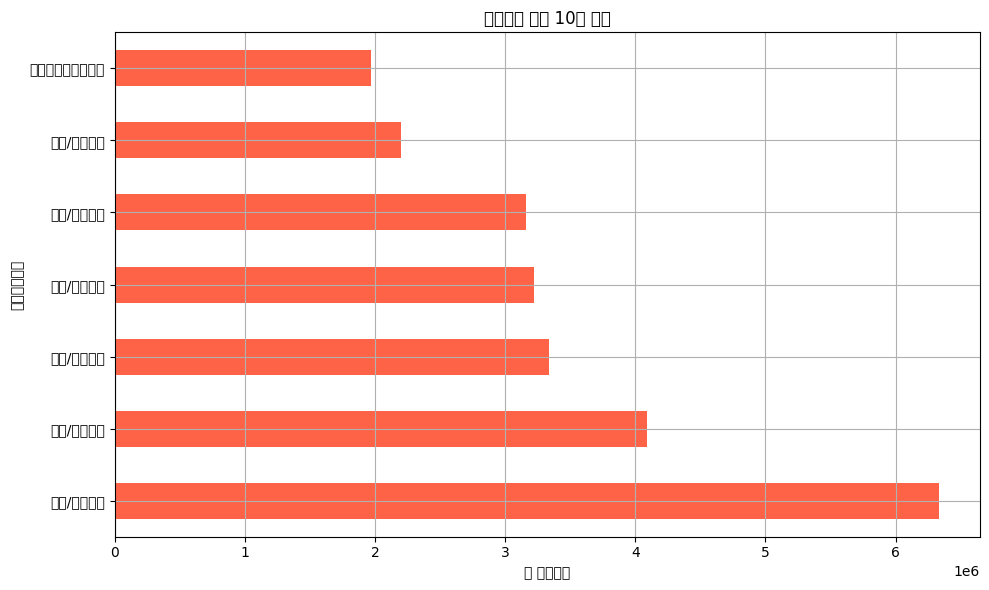

In [ ]:
# ✅ 총체납금 계산
df_cleaned['총체납금'] = pd.to_numeric(df_cleaned['가산금_미납금'], errors='coerce').fillna(0) + \
                         pd.to_numeric(df_cleaned['유지보수비_미납금'], errors='coerce').fillna(0)

# ✅ 본부별 체납 금액 집계 (상위 10개)
top10 = df_cleaned.groupby('미납관리본부')['총체납금'].sum().nlargest(10)

# ✅ 시각화
top10.plot(kind='barh', figsize=(10, 6), color='tomato', title='체납금액 상위 10개 본부')
plt.xlabel('총 체납금액')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 1️⃣ 한글 폰트 설치 및 설정
!apt-get install -y fonts-nanum
!fc-cache -fv

# 2️⃣ 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 3️⃣ 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

# 4️⃣ 파일 경로 및 인코딩 감지
import chardet

csv_file_path = '/content/drive/MyDrive/회사업무/체납/24년11월 체납확정.csv'

# 인코딩 자동 감지
with open(csv_file_path, 'rb') as file:
    raw_data = file.read(10000)
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"감지된 인코딩: {detected_encoding}")

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path, encoding=detected_encoding)
print("파일 불러오기 성공 ✅")

# 데이터프레임 미리보기
print(df.info())
print(df.head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.6 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

<ipython-input-10-ab6d882d1be1>:33: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding=detected_encoding)


<ipython-input-11-a888b93a2ba3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['총체납금'] = pd.to_numeric(df_cleaned['가산금_미납금'], errors='coerce').fillna(0) + \
<ipython-input-11-a888b93a2ba3>:18: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-a888b93a2ba3>:18: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-a888b93a2ba3>:18: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-a888b93a2ba3>:18: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11

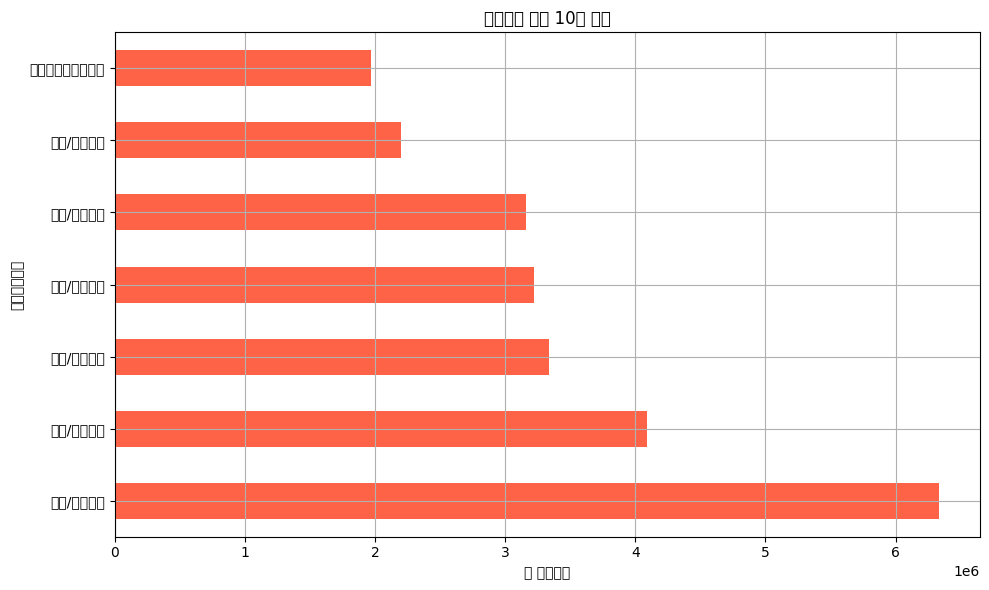

In [ ]:
# ✅ 열 이름 공백 제거 및 정리
df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace(" ", "").str.replace("\xa0", "")

# ✅ NaN이 50% 이상인 열 제거 (선택사항)
threshold = int(len(df) * 0.5)
df_cleaned = df.dropna(axis=1, thresh=threshold)

# ✅ 체납금액 계산 (가산금_미납금 + 유지보수비_미납금)
df_cleaned['총체납금'] = pd.to_numeric(df_cleaned['가산금_미납금'], errors='coerce').fillna(0) + \
                         pd.to_numeric(df_cleaned['유지보수비_미납금'], errors='coerce').fillna(0)

# ✅ 본부별 체납금액 상위 10개 시각화
top10 = df_cleaned.groupby('미납관리본부')['총체납금'].sum().nlargest(10)

top10.plot(kind='barh', figsize=(10, 6), color='tomato', title='체납금액 상위 10개 본부')
plt.xlabel('총 체납금액')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-12-decd748ca3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['납기일'] = pd.to_datetime(df_cleaned['납기일'], errors='coerce')
<ipython-input-12-decd748ca3cc>:9: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-decd748ca3cc>:9: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-decd748ca3cc>:9: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-decd748ca3cc>:9: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-12-decd748ca3cc>:9: User

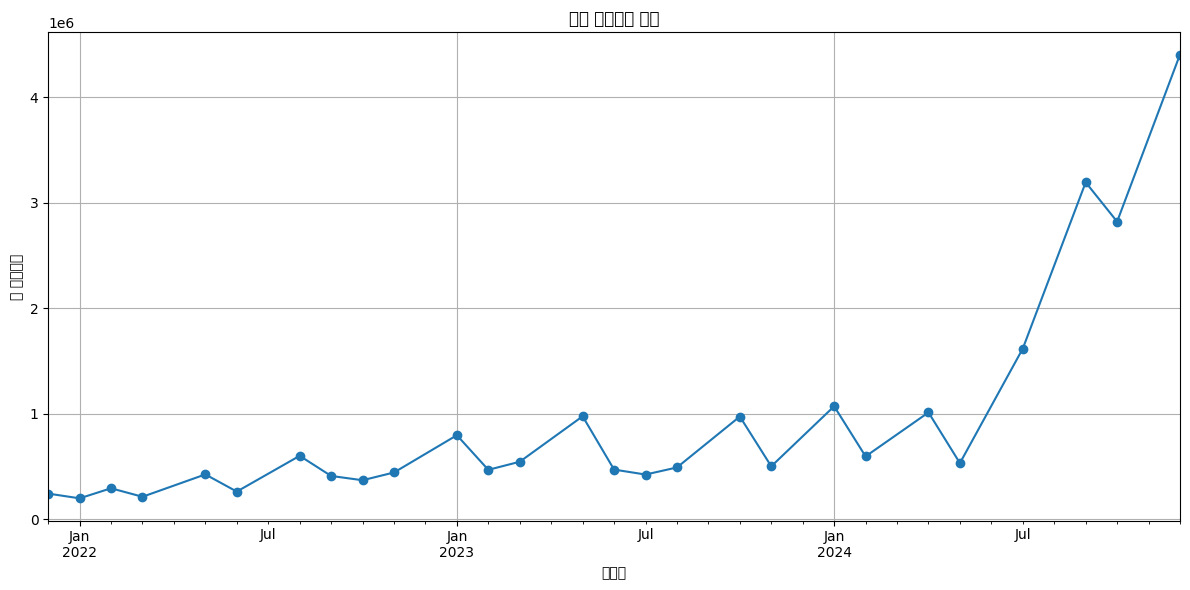

In [ ]:
df_cleaned['납기일'] = pd.to_datetime(df_cleaned['납기일'], errors='coerce')
df_cleaned['납기월'] = df_cleaned['납기일'].dt.to_period('M')

monthly = df_cleaned.groupby('납기월')['총체납금'].sum()

monthly.plot(kind='line', marker='o', figsize=(12, 6), title='월별 체납금액 추이')
plt.ylabel('총 체납금액')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import gspread
import pandas as pd
import numpy as np
from google.colab import drive
from google.oauth2.service_account import Credentials

# 🔹 구글 드라이브 마운트
drive.mount('/content/drive', force_remount=True)

# 🔹 구글 API 인증 (경로 수정)
json_keyfile_path = "/content/drive/My Drive/Key/credentials.json"

# 🔹 구글 API 연결
creds = Credentials.from_service_account_file(json_keyfile_path, scopes=["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"])
client = gspread.authorize(creds)

# 🔹 구글 스프레드시트 연결
spreadsheet = client.open_by_key("1m9V4SBeplfOvwfr36gKpv2aF-kU2xl5wlXfbvVEEU1E")
sheet = spreadsheet.worksheet("2.12일 전사")

# 🔹 A4:H11 범위 가져오기 (병합된 부분을 고려하여 4번째 행부터 가져옴)
data = sheet.get("A4:H11")

# 🔹 데이터 정리 (첫 번째 행을 헤더로 사용)
df = pd.DataFrame(data[1:], columns=data[0])

# 🔹 숫자 변환 (applymap 사용)
df.iloc[:, 1:] = df.iloc[:, 1:].applymap(lambda x: pd.to_numeric(str(x).replace(",", "").replace("%", ""), errors='coerce'))

# 🔹 데이터 확인
print(df.head())

Mounted at /content/drive


WorksheetNotFound: 2.12일 전사

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 한글 폰트 강제 적용 (NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# 🔹 본부명(A열), 건수(E열), 정지율(G열) 데이터 추출
df_viz = df.iloc[:-1, [0, 4, 6]]  # 합계 제외
df_viz.columns = ["본부명", "건수", "정지율"]

# 🔹 그래프 설정
fig, ax1 = plt.subplots(figsize=(12,6))

# 🔹 막대 그래프 (건수) - E열 데이터 적용
ax1.bar(df_viz["본부명"], df_viz["건수"], color='skyblue', label="건수")
ax1.set_xlabel("본부명", fontsize=14, fontproperties=fontprop)
ax1.set_ylabel("건수", color='skyblue', fontsize=14, fontproperties=fontprop)
ax1.tick_params(axis='y', labelcolor='skyblue')

# 🔹 X축 폰트 강제 적용 (깨짐 방지)
plt.xticks(fontproperties=fontprop, fontsize=12)

# 🔹 막대 그래프 내부에 값 레이블 추가
for i, v in enumerate(df_viz["건수"]):
    ax1.text(i, v-0.5, str(int(v)), ha='center', va='bottom', color="black", fontsize=12, fontproperties=fontprop)

# 🔹 선 그래프 (정지율)
ax2 = ax1.twinx()
ax2.plot(df_viz["본부명"], df_viz["정지율"], color='red', marker='o', linestyle='-', linewidth=2, label="정지율 (%)")
ax2.set_ylabel("정지율 (%)", color='red', fontsize=14, fontproperties=fontprop)
ax2.tick_params(axis='y', labelcolor='red')

# 🔹 정지율 레이블 표시
for i, v in enumerate(df_viz["정지율"]):
    ax2.text(i, v+0.05, f"{v:.2f}%", ha='center', va='bottom', color="red", fontsize=12, fontproperties=fontprop)

# 🔹 범례 각각 설정 (한글 적용)
ax1.legend(loc="upper left", fontsize=12, prop=fontprop)  # 건수
ax2.legend(loc="upper right", fontsize=12, prop=fontprop)  # 정지율

# 🔹 제목 (한글 적용)
plt.title("본부별 건수 및 정지율", fontsize=16, fontproperties=fontprop)

# 🔹 최종 그래프 출력
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'